#Servo Prediction using Linear Regression

## Objective :
A servomotor (or servo motor) is a simple electric motor, controlled with the help of servomechanism. If the motor as a controlled device, associated with servomechanism is DC motor, then it is commonly known as a DC Servo Motor. If AC operates the controlled motor, it is known as a AC Servo Motor.
A dataframe with 167 observations on 5 variables , 4 nominal and 1 as the target class . This data set is from a simulation of a servo syatem involving a servo amplifier , a motor , a lead screw/nut and a sliding carraige of some sort . It may have been on of the translational axes of a robot on the 9th floor of the Ai lab . In any case , the output values is almost certainly a rise time or the time required for the system to respond to a step change in a position set point . The variables that describe the data set and their values are the following:
1. Motor A,B,C,D,E
2. Screw A,B,C,D,E
3. Pgain 3,4,5,6
4. Vgain 1,2,3,4,5
5. Class 0.13 to 7.10

#Data Source

In [8]:
df=pd.read_csv(r"https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv")
df

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


#Import Libraries

In [41]:
import numpy as np
import pandas as pd

#Describe Data

In [10]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [12]:
df[['Motor']].value_counts()
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
dtype: int64

#Data Preprocessing

In [15]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

#Define Target Varibale (y) and Feature Variables(X)

In [17]:
y=df['Class']
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [19]:
X=df[['Motor','Screw','Pgain','Vgain']]
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [23]:
lr.fit(X_train,y_train)

LinearRegression()

#Modeling

In [26]:
y_pred=lr.predict(X_test)
y_pred

array([ 22.20723254,  27.79373855,  25.155679  ,  19.03928   ,
        20.75085226,  40.83364183,  46.59780586,  23.62176476,
        18.07402574,   7.98565   ,  23.52472177,   9.34190621,
        26.39563428,  35.5023278 ,   1.15918871,  32.37622331,
        14.88964524,  14.67322023,  33.47728755,  24.939254  ,
        31.98214029,  11.68292572,  14.45679523,  43.82393634,
        24.05461477,  22.16538448,  39.24145158,  28.14597352,
        12.11577572, -12.80469059,   9.26437225,   3.50020822,
        -1.35697756,  16.26541048,  17.72179076,  14.85087826,
         9.48079726, -20.16104487,  19.255705  ,  13.70796597,
         9.40018222,  41.05006683,   7.84675895,  29.20827077,
        39.33849457,  17.66351475,  13.17807298,  27.89078154,
         5.21178048,  23.30829677,   3.93305823])

#Model Evaluation

In [27]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [28]:
mean_squared_error(y_test,y_pred)

96.75334708937615

In [30]:
mean_absolute_error(y_test,y_pred)

7.649447838372802

In [31]:
r2_score(y_test,y_pred)

0.4797389845579637

#Data Visualization

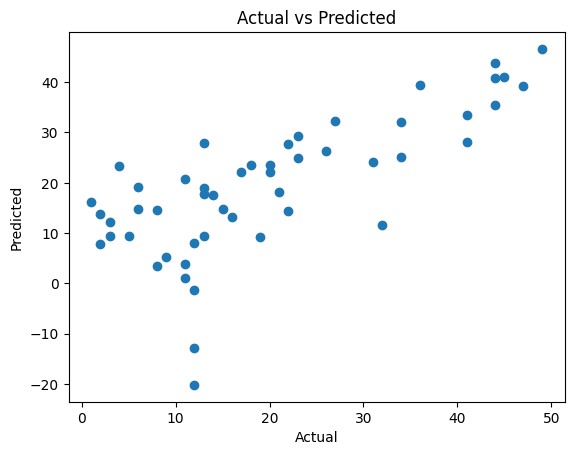

In [32]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

#Prediction

# Getting Future Predictions

###Get a Random sample from the existing dataset as a new value
###1.Extract a random row using a sample function
###2.Seperate X and Y
###3.Standardize X
###4.Predict

In [38]:
X_new=df.sample(1)

In [39]:
X_new=X_new.drop('Class',axis=1)
X_new

,Motor,Screw,Pgain,Vgain
63,2,0,6,1


In [40]:
y_pred_new = lr.predict(X_new)
y_pred_new

array([-20.16104487])